In [2]:
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json
import pandas as pd

In [167]:
def read_all_model_eval():
    result_list = []
    for corpus in ['github', 'twitter', 'wikitext']:
        path = '../result/%s' % corpus
        for root, dirs, files in os.walk(path):
            for file in files:
                file_path = os.path.join(path, file)
                file_split = file.split('_')
                model, sg, size, mincount = file_split[0], file_split[2], file_split[4], file_split[6]
                # print('%s, %s, %s, %s' % (model, sg, size, mincount))
                with open(file_path, 'r') as fp:
                    result = json.load(fp)
                [pearson, spearman, oov_ratio, correct, incorrect] = result
                result_entry = [corpus, model, sg, int(size), int(mincount), 
                                float(pearson[0]), float(spearman[0]), float(oov_ratio), 
                                int(correct), int(incorrect)]
                result_list.append(result_entry)
    return pd.DataFrame(data=result_list, 
                        columns=['corpus', 'model', 'sg', 'size', 'mincount', 
                                 'pearson', 'spearman', 'oov_ratio', 'correct', 'incorrect'])

In [168]:
df = read_all_model_eval()
print(df)

       corpus     model sg  size  mincount   pearson  spearman  oov_ratio  \
0      github  word2vec  0   250        15  0.417224  0.404744  16.430595   
1      github  fasttext  1   300        20  0.365935  0.351827  22.096317   
2      github  fasttext  1   400        10  0.341928  0.349689  13.031161   
3      github  fasttext  0   300        10  0.329250  0.319519  13.031161   
4      github  fasttext  1   350        20  0.394635  0.396704  22.096317   
5      github  fasttext  1   400        20  0.382178  0.381305  22.096317   
6      github  fasttext  1   300        10  0.360501  0.375226  13.031161   
7      github  word2vec  1   300         0  0.345030  0.384074   4.815864   
8      github  word2vec  0   350         5  0.384438  0.375625   9.631728   
9      github  fasttext  1   250        15  0.365562  0.359280  16.430595   
10     github  word2vec  1   350         0  0.360344  0.405672   4.815864   
11     github  word2vec  1   400         5  0.372466  0.419699   9.631728   

In [185]:
def plot_heatmap(df, corpus, model, sg):
    df2 = df.loc[(df['corpus'] == corpus) & (df['model'] == model) & (df['sg'] == sg)]
    df3 = df2.pivot('mincount', 'size', 'pearson')
    sns.heatmap(df3)

In [170]:
def plot_heatmap_pearson(df, corpus, vmin, vmax):
    heatmap_list = []
    title_list = []
    for model in ['word2vec', 'fasttext']:
        for sg in ['0', '1']:
            df2 = df.loc[(df['corpus'] == corpus) & (df['model'] == model) & (df['sg'] == sg)]
            df3 = df2.pivot('mincount', 'size', 'pearson')
            print(df3)
            heatmap_list.append(df3)
            title_list.append('%s_%s' % (model, 'sg' if sg == '1' else 'cbow'))
    fig, axn = plt.subplots(2, 2, sharex=True, sharey=True)
    fig.suptitle('%s Pearson Corr' % corpus.capitalize())
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for i, ax in enumerate(axn.flat):
        sns.heatmap(heatmap_list[i], ax=ax, vmin=vmin, vmax=vmax, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        ax.set_title(title_list[i])
    fig.tight_layout(rect=[0, 0, .9, 1])
    fig.subplots_adjust(top=0.88)

size           200       250       300       350       400
mincount                                                  
0         0.372100  0.389001  0.386311  0.366371  0.370538
5         0.374588  0.376069  0.371561  0.384438  0.373701
10        0.396767  0.407644  0.377604  0.405860  0.424438
15        0.422836  0.417224  0.422141  0.425228  0.420146
20        0.435152  0.441354  0.447918  0.442756  0.435749
size           200       250       300       350       400
mincount                                                  
0         0.356893  0.367477  0.345030  0.360344  0.340683
5         0.363330  0.374564  0.355590  0.358318  0.372466
10        0.396595  0.371486  0.382863  0.372828  0.366470
15        0.408544  0.403958  0.416908  0.421926  0.436668
20        0.435694  0.436578  0.438655  0.425342  0.446490
size           200       250       300       350       400
mincount                                                  
0         0.288221  0.290418  0.280122  0.261766  0.2834

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


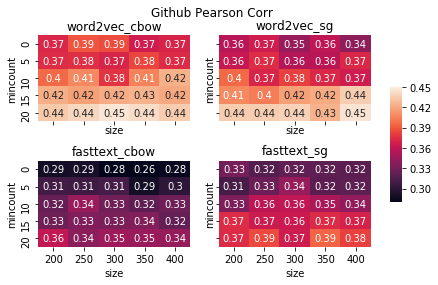

In [319]:
plot_heatmap_pearson(df, 'github', 0.28, 0.45)

size           200       250       300       350       400
mincount                                                  
0         0.528585  0.534061  0.533062  0.532853  0.530391
5         0.532145  0.543643  0.533006  0.539307  0.529684
10        0.550677  0.547458  0.534336  0.533168  0.530618
15        0.535619  0.536625  0.536646  0.528583  0.535678
20        0.544684  0.545275  0.532341  0.533018  0.528854
size           200       250       300       350       400
mincount                                                  
0         0.606587  0.614198  0.611575  0.585009  0.572279
5         0.607317  0.596667  0.598448  0.580847  0.572991
10        0.602363  0.601414  0.611816  0.592606  0.575230
15        0.612441  0.601015  0.588998  0.600061  0.576988
20        0.605719  0.602292  0.595114  0.577120  0.586304
size           200       250       300       350       400
mincount                                                  
0         0.339570  0.341229  0.348629  0.329870  0.3432

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


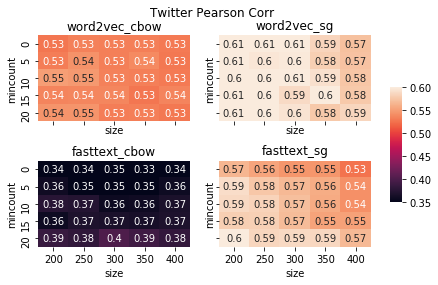

In [320]:
plot_heatmap_pearson(df, 'twitter', 0.35, 0.60)

size           200       250       300       350       400
mincount                                                  
0         0.625591  0.621196  0.619636  0.615967  0.612521
5         0.626621  0.616717  0.620786  0.628316  0.621931
10        0.626809  0.625802  0.621482  0.614169  0.615095
15        0.620405  0.619612  0.623291  0.621603  0.618661
20        0.615575  0.626488  0.618682  0.619793  0.616896
size           200       250       300       350       400
mincount                                                  
0         0.653401  0.660079  0.648580  0.655413  0.645706
5         0.655967  0.655943  0.654268  0.654640  0.650193
10        0.651845  0.648702  0.654134  0.649462  0.660844
15        0.655293  0.653864  0.652971  0.655624  0.650326
20        0.658620  0.650912  0.649912  0.653338  0.647544
size           200       250       300       350       400
mincount                                                  
0         0.528370  0.518511  0.524142  0.525598  0.5197

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


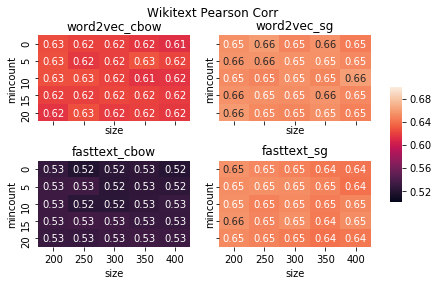

In [173]:
plot_heatmap_pearson(df, 'wikitext', 0.5, 0.7)

In [174]:
def plot_heatmap_spearman(df, corpus, vmin, vmax):
    heatmap_list = []
    title_list = []
    for model in ['word2vec', 'fasttext']:
        for sg in ['0', '1']:
            df2 = df.loc[(df['corpus'] == corpus) & (df['model'] == model) & (df['sg'] == sg)]
            df3 = df2.pivot('mincount', 'size', 'spearman')
            print(df3)
            heatmap_list.append(df3)
            title_list.append('%s_%s' % (model, 'sg' if sg == '1' else 'cbow'))
    fig, axn = plt.subplots(2, 2, sharex=True, sharey=True)
    fig.suptitle('%s Spearman Corr' % corpus.capitalize())
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for i, ax in enumerate(axn.flat):
        sns.heatmap(heatmap_list[i], ax=ax, vmin=vmin, vmax=vmax, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        ax.set_title(title_list[i])
    fig.tight_layout(rect=[0, 0, .9, 1])
    fig.subplots_adjust(top=0.88)

size           200       250       300       350       400
mincount                                                  
0         0.371093  0.382900  0.376526  0.364154  0.359108
5         0.370916  0.374424  0.361946  0.375625  0.370648
10        0.391915  0.405116  0.374025  0.407561  0.410101
15        0.416592  0.404744  0.421008  0.419981  0.413923
20        0.437317  0.439626  0.445349  0.440584  0.428059
size           200       250       300       350       400
mincount                                                  
0         0.388637  0.396084  0.384074  0.405672  0.394007
5         0.394605  0.419409  0.391198  0.402731  0.419699
10        0.420603  0.407330  0.422384  0.424143  0.410229
15        0.416432  0.410726  0.425581  0.446259  0.467056
20        0.434114  0.439324  0.449209  0.431296  0.467382
size           200       250       300       350       400
mincount                                                  
0         0.286989  0.283340  0.272694  0.253575  0.2789

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


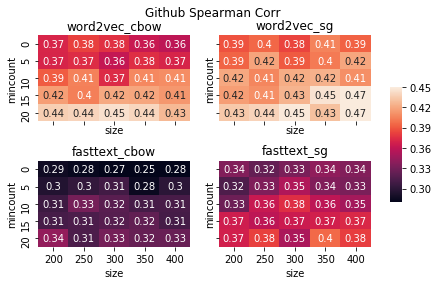

In [333]:
plot_heatmap_spearman(df, 'github', 0.28, 0.45)

size           200       250       300       350       400
mincount                                                  
0         0.532869  0.538754  0.542331  0.544825  0.542392
5         0.529185  0.553273  0.543386  0.551774  0.537872
10        0.557879  0.554575  0.541649  0.540390  0.539186
15        0.542508  0.541693  0.543314  0.540248  0.545906
20        0.554312  0.553568  0.539880  0.541646  0.542549
size           200       250       300       350       400
mincount                                                  
0         0.628493  0.642610  0.638507  0.616582  0.606936
5         0.636393  0.631459  0.633769  0.630184  0.612181
10        0.631070  0.634155  0.650298  0.636160  0.621807
15        0.640756  0.630791  0.625042  0.646714  0.622156
20        0.628914  0.633119  0.632063  0.609877  0.634726
size           200       250       300       350       400
mincount                                                  
0         0.307246  0.313491  0.325387  0.308380  0.3204

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


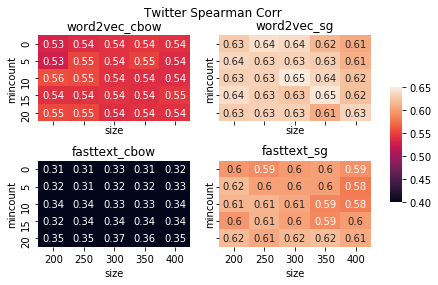

In [334]:
plot_heatmap_spearman(df, 'twitter', 0.40, 0.65)

size           200       250       300       350       400
mincount                                                  
0         0.647160  0.643098  0.644838  0.641368  0.639626
5         0.648418  0.640466  0.646255  0.653989  0.646507
10        0.650905  0.647919  0.640741  0.638528  0.640025
15        0.644096  0.643219  0.643879  0.647119  0.643775
20        0.637363  0.646710  0.643438  0.643660  0.638728
size           200       250       300       350       400
mincount                                                  
0         0.676409  0.680861  0.676874  0.686704  0.683280
5         0.679403  0.679548  0.685379  0.685722  0.691101
10        0.674937  0.679257  0.687421  0.682921  0.695255
15        0.682963  0.684120  0.684000  0.691974  0.681943
20        0.684193  0.676821  0.677825  0.685192  0.686508
size           200       250       300       350       400
mincount                                                  
0         0.529379  0.517948  0.523285  0.529865  0.5240

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


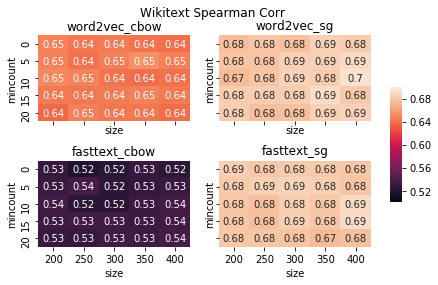

In [176]:
plot_heatmap_spearman(df, 'wikitext', 0.5, 0.7)

In [177]:
def plot_heatmap_question(df, corpus, vmin, vmax):
    heatmap_list = []
    title_list = []
    for model in ['word2vec', 'fasttext']:
        for sg in ['0', '1']:
            df2 = df.loc[(df['corpus'] == corpus) & (df['model'] == model) & (df['sg'] == sg)]
            df2['acc'] = df2['correct'] / (df2['correct'] + df2['incorrect'])
            df3 = df2.pivot('mincount', 'size', 'acc')
            print(df3)
            heatmap_list.append(df3)
            title_list.append('%s_%s' % (model, 'sg' if sg == '1' else 'cbow'))
    fig, axn = plt.subplots(2, 2, sharex=True, sharey=True)
    fig.suptitle('%s Acc' % corpus.capitalize())
    cbar_ax = fig.add_axes([.91, .3, .03, .4])
    for i, ax in enumerate(axn.flat):
        sns.heatmap(heatmap_list[i], ax=ax, vmin=vmin, vmax=vmax, cbar=i == 0, cbar_ax=None if i else cbar_ax, annot=True)
        ax.set_title(title_list[i])
    fig.tight_layout(rect=[0, 0, .9, 1])
    fig.subplots_adjust(top=0.88)

/home/jyuwei/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


size           200       250       300       350       400
mincount                                                  
0         0.156174  0.158342  0.164935  0.168187  0.162406
5         0.174486  0.173067  0.182693  0.182288  0.185024
10        0.209632  0.213181  0.211660  0.212167  0.215209
15        0.217908  0.223435  0.227442  0.236977  0.239602
20        0.243280  0.249542  0.245571  0.252596  0.265272
size           200       250       300       350       400
mincount                                                  
0         0.137431  0.142021  0.131401  0.137251  0.129871
5         0.148647  0.150066  0.149458  0.150066  0.146418
10        0.179087  0.179848  0.183523  0.178580  0.171483
15        0.195247  0.202708  0.196214  0.195108  0.194418
20        0.211820  0.210293  0.209835  0.220220  0.202963
size           200       250       300       350       400
mincount                                                  
0         0.404390  0.403938  0.402764  0.400686  0.4007

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


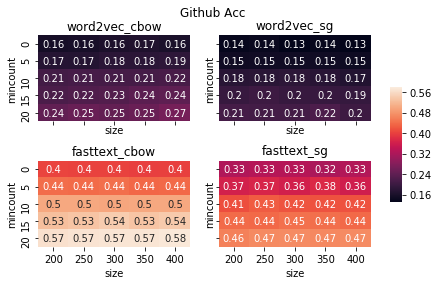

In [337]:
plot_heatmap_question(df, 'github', 0.13, 0.58)

/home/jyuwei/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


size           200       250       300       350       400
mincount                                                  
0         0.168504  0.175072  0.178982  0.180702  0.181406
5         0.166549  0.175541  0.170224  0.182501  0.177965
10        0.176959  0.184837  0.188818  0.194663  0.191105
15        0.181288  0.195640  0.195910  0.204431  0.198332
20        0.192005  0.212728  0.205166  0.213121  0.211452
size           200       250       300       350       400
mincount                                                  
0         0.095253  0.095645  0.085367  0.085131  0.076265
5         0.096430  0.089211  0.089133  0.082778  0.080973
10        0.101991  0.101144  0.093266  0.095129  0.082423
15        0.101812  0.109706  0.100377  0.103068  0.094636
20        0.120801  0.118739  0.110489  0.110686  0.099096
size           200       250       300       350       400
mincount                                                  
0         0.352452  0.351510  0.348215  0.343978  0.3419

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


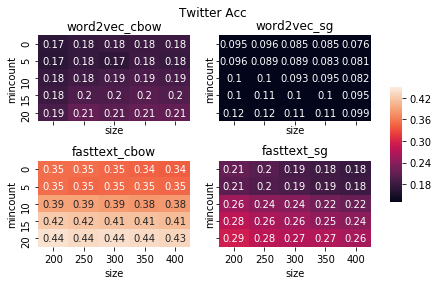

In [338]:
plot_heatmap_question(df, 'twitter', 0.13, 0.45)

/home/jyuwei/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


size           200       250       300       350       400
mincount                                                  
0         0.484421  0.494032  0.501085  0.499845  0.505348
5         0.487676  0.502480  0.504960  0.505426  0.501240
10        0.486824  0.491474  0.499457  0.508371  0.500775
15        0.489614  0.488296  0.503798  0.499767  0.502093
20        0.493722  0.496280  0.503643  0.502170  0.498682
size           200       250       300       350       400
mincount                                                  
0         0.529840  0.536971  0.547822  0.542707  0.540769
5         0.528290  0.532631  0.537824  0.543404  0.538521
10        0.533793  0.541621  0.544257  0.544334  0.535576
15        0.541389  0.539064  0.537901  0.543559  0.544799
20        0.532011  0.545884  0.545574  0.548752  0.540381
size           200       250       300       350       400
mincount                                                  
0         0.585181  0.588281  0.585801  0.577972  0.5746

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


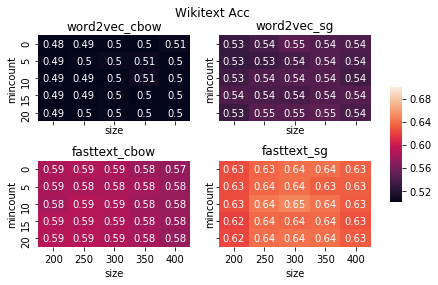

In [179]:
plot_heatmap_question(df, 'wikitext', 0.5, 0.7)

In [181]:
def print_heatmap_question_coverage(df, corpus):
    heatmap_list = []
    title_list = []
    for model in ['word2vec', 'fasttext']:
        for sg in ['0', '1']:
            df2 = df.loc[(df['corpus'] == corpus) & (df['model'] == model) & (df['sg'] == sg)]
            df2['coverage'] = (df2['correct'] + df2['incorrect'])
            df3 = df2.pivot('mincount', 'size', 'coverage')
            print(df3)

In [361]:
print_heatmap_question_coverage(df, 'github')

size        200    250    300    350    400
mincount                                   
0         11071  11071  11071  11071  11071
5          9869   9869   9869   9869   9869
10         7890   7890   7890   7890   7890
15         7237   7237   7237   7237   7237
20         6548   6548   6548   6548   6548
size        200    250    300    350    400
mincount                                   
0         11111  11111  11111  11111  11111
5          9869   9869   9869   9869   9869
10         7890   7890   7890   7890   7890
15         7237   7237   7237   7237   7237
20         6548   6548   6548   6548   6548
size        200    250    300    350    400
mincount                                   
0         11071  11071  11071  11071  11071
5          9869   9869   9869   9869   9869
10         7890   7890   7890   7890   7890
15         7237   7237   7237   7237   7237
20         6548   6548   6548   6548   6548
size        200    250    300    350    400
mincount                        

/home/jyuwei/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [363]:
print_heatmap_question_coverage(df, 'twitter')

size        200    250    300    350    400
mincount                                   
0         12789  12789  12789  12789  12789
5         12789  12789  12789  12789  12789
10        11805  11805  11805  11805  11805
15        11148  11148  11148  11148  11148
20        10182  10182  10182  10182  10182
size        200    250    300    350    400
mincount                                   
0         12745  12745  12745  12745  12745
5         12745  12745  12745  12745  12745
10        11805  11805  11805  11805  11805
15        11148  11148  11148  11148  11148
20        10182  10182  10182  10182  10182
size        200    250    300    350    400
mincount                                   
0         12745  12745  12745  12745  12745
5         12745  12745  12745  12745  12745
10        11805  11805  11805  11805  11805
15        11148  11148  11148  11148  11148
20        10182  10182  10182  10182  10182
size        200    250    300    350    400
mincount                        

/home/jyuwei/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [182]:
print_heatmap_question_coverage(df, 'wikitext')

size        200    250    300    350    400
mincount                                   
0         12902  12902  12902  12902  12902
5         12902  12902  12902  12902  12902
10        12902  12902  12902  12902  12902
15        12902  12902  12902  12902  12902
20        12902  12902  12902  12902  12902
size        200    250    300    350    400
mincount                                   
0         12902  12902  12902  12902  12902
5         12902  12902  12902  12902  12902
10        12902  12902  12902  12902  12902
15        12902  12902  12902  12902  12902
20        12902  12902  12902  12902  12902
size        200    250    300    350    400
mincount                                   
0         12902  12902  12902  12902  12902
5         12902  12902  12902  12902  12902
10        12902  12902  12902  12902  12902
15        12902  12902  12902  12902  12902
20        12902  12902  12902  12902  12902
size        200    250    300    350    400
mincount                        

/home/jyuwei/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [183]:
vec = [['github', 0, 11071, 39366], ['github', 5, 9869, 26104], ['github', 10, 7890, 21638],
       ['github', 15, 7237, 19324], ['github', 20, 6548, 17736], 
       ['twitter', 0, 12789, 46586], ['twitter', 5, 12789, 31085], ['twitter', 10, 11805, 25091],
       ['twitter', 15, 11148, 21835], ['twitter', 20, 10182, 19712],
       ['wikitext', 0, 12902, 69828], ['wikitext', 5, 12902, 52871], ['wikitext', 10, 12902, 45578],
       ['wikitext', 15, 12902, 41229], ['wikitext', 20, 12902, 38085]
      ]

df2 = pd.DataFrame(data=vec, 
                        columns=['corpus', 'mincount', 'question coverage', 'vocabulary size'])

In [184]:
def plot_size(df, corpus):
    df2 = df.loc[df['corpus'] == corpus]
    df3 = df2[['mincount', 'question coverage', 'vocabulary size']].set_index('mincount')
    print(df3)
    plt.suptitle('%s Vocab & Coverage' % corpus.capitalize())
    sns.lineplot(data=df3, linewidth=2.5, dashes=False, markers=True)

          question coverage  vocabulary size
mincount                                    
0                     11071            39366
5                      9869            26104
10                     7890            21638
15                     7237            19324
20                     6548            17736


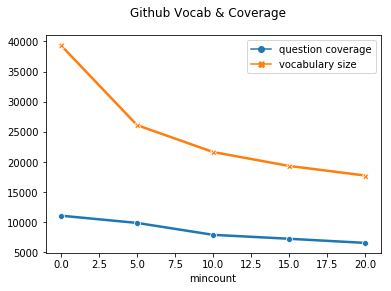

In [65]:
plot_size(df2, 'github')

          question coverage  vocabulary size
mincount                                    
0                     12789            46586
5                     12789            31085
10                    11805            25091
15                    11148            21835
20                    10182            19712


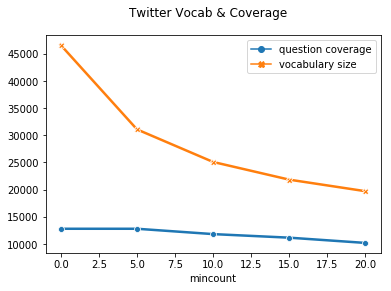

In [66]:
plot_size(df2, 'twitter')

          question coverage  vocabulary size
mincount                                    
0                     12902            69828
5                     12902            52871
10                    12902            45578
15                    12902            41229
20                    12902            38085


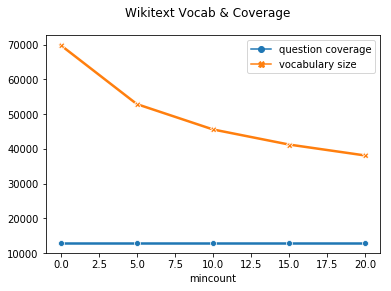

In [185]:
plot_size(df2, 'wikitext')

In [71]:
def read_svd_align():
    with open('../result/align_space/svd.out', 'r') as fp:
        lines = fp.readlines()
    lines = [line.rstrip() for line in lines]
    index_list = [index for index,line in enumerate(lines) if line.startswith('seed')]
    seed_list = np.array([int(lines[ind].split(' ')[1]) for ind in index_list])
    train_eval_mean = np.array([float(lines[ind + 3]) for ind in index_list])
    train_eval_std = np.array([float(lines[ind + 4]) for ind in index_list])
    
    plt.errorbar(seed_list, train_eval_mean, train_eval_std / 2, marker='^')
    plt.ylim(0.4, 0.9)
    plt.show()
    
    test_eval_mean = np.array([float(lines[ind + 6]) for ind in index_list])
    test_eval_std = np.array([float(lines[ind + 7]) for ind in index_list])
    
    plt.errorbar(seed_list, test_eval_mean, test_eval_std / 2, marker='^')
    plt.ylim(0.4, 0.9)
    plt.show()
 
    print(seed_list)
    print(train_eval_mean)
    print(train_eval_std)
    print(test_eval_mean)
    print(test_eval_std)
    

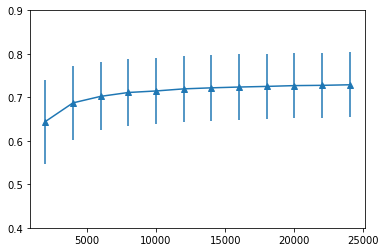

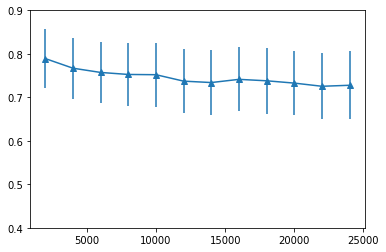

[ 2000  4000  6000  8000 10000 12000 14000 16000 18000 20000 22000 24000]
[0.64422408 0.68725582 0.70222496 0.71113332 0.71464102 0.71945509
 0.72184672 0.72367768 0.72512143 0.72696406 0.72759533 0.72887823]
[0.19296445 0.16862204 0.15654566 0.15392545 0.15338057 0.15147024
 0.15259348 0.15075691 0.14993721 0.15077554 0.15074136 0.15045478]
[0.78913846 0.76699916 0.75723718 0.75261065 0.75202208 0.73722946
 0.73400771 0.74134953 0.73803307 0.73271956 0.72542304 0.72775563]
[0.13543744 0.13991084 0.14063132 0.14316596 0.14660561 0.14878654
 0.14754129 0.14732058 0.15116817 0.14667414 0.15214504 0.15552372]


In [72]:
read_svd_align()

In [163]:
def read_svd_distance(method):
    path = '../result/align_space/%s' % method
    result_mat = []
    for root, dirs, files in os.walk(path):
        for file in files:
            with open(os.path.join(root, file), 'r') as fp:
                size = int(file)
                [train, test] = json.load(fp)
                for t in train:
                    result_mat.append([size, 'train', t])
                for t in test:
                    result_mat.append([size, 'test', t])
    # train_df = pd.DataFrame(data=train_mat, columns=['size', 'train or test' 'distance_train'])
    # print(train_df.size)
    # g = sns.catplot(x="size", y="distance", data=train_df, kind="box", aspect=2)
    # sns.catplot(x="size", y="distance", kind="point", data=train_df, aspect=5)
    
    # test_df = pd.DataFrame(data=test_mat, columns=['size', 'distance_test'])
    # print(test_df.size)
    # g = sns.catplot(x="size", y="distance", data=test_df, kind="box", aspect=2)
    # sns.catplot(x="size", y="distance", kind="point", data=test_df, aspect=5, color='r')
    result_df = pd.DataFrame(data=result_mat, columns=['size', 'type', 'distance'])
    sns.catplot(x="size", y="distance", hue='type', kind="point", data=result_df, aspect=2)

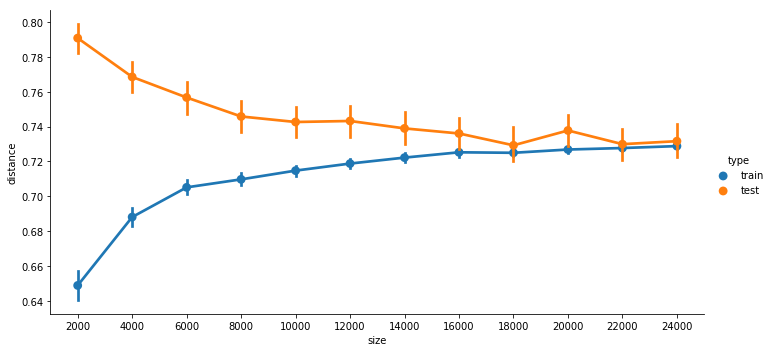

In [164]:
read_svd_distance('svd')